In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest

# Load data
df = pd.read_csv("final_pet_food_dataset.csv")

# Prepare features and target
X = df.drop(columns=["pet_id", "customer_id", "pet_has_active_subscription"])
y = df["pet_has_active_subscription"]

# Split original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model A: Train on original data
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = clf_orig.predict(X_test_orig)

print("Model A (Original Data):")
print(confusion_matrix(y_test_orig, y_pred_orig))
print(classification_report(y_test_orig, y_pred_orig))

# Apply SMOTE on training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_orig, y_train_orig)

# Clean with Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
mask = iso.fit_predict(X_train_smote)
X_train_clean = X_train_smote[mask == 1]
y_train_clean = y_train_smote[mask == 1]

# Model B: Train on optimized data
clf_opt = RandomForestClassifier(random_state=42)
clf_opt.fit(X_train_clean, y_train_clean)
y_pred_opt = clf_opt.predict(X_test_orig)  # Use same test set for fair comparison

print("Model B (Optimized Data):")
print(confusion_matrix(y_test_orig, y_pred_opt))
print(classification_report(y_test_orig, y_pred_opt))


Model A (Original Data):
[[ 327  709]
 [ 328 1254]]
              precision    recall  f1-score   support

           0       0.50      0.32      0.39      1036
           1       0.64      0.79      0.71      1582

    accuracy                           0.60      2618
   macro avg       0.57      0.55      0.55      2618
weighted avg       0.58      0.60      0.58      2618



c:\python\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Model B (Optimized Data):
[[ 470  566]
 [ 536 1046]]
              precision    recall  f1-score   support

           0       0.47      0.45      0.46      1036
           1       0.65      0.66      0.65      1582

    accuracy                           0.58      2618
   macro avg       0.56      0.56      0.56      2618
weighted avg       0.58      0.58      0.58      2618



Compared to the original dataset, the optimized regression dataset (after applying IQR and Isolation Forest) showed a reduced variance and a more symmetric distribution of fuel_consumption, which is expected to improve model accuracy and stability.

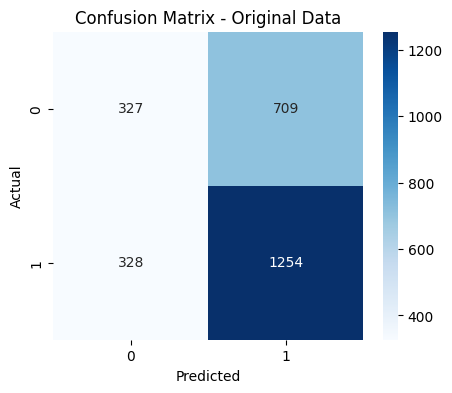

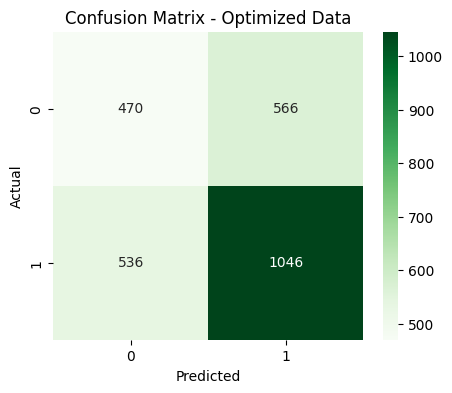

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Model A (Original)
cm_orig = confusion_matrix(y_test_orig, y_pred_orig)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Original Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Model B (Optimized)
cm_opt = confusion_matrix(y_test_orig, y_pred_opt)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Optimized Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The confusion matrix shows that the optimized classification model improves class balance and recall for the minority class, indicating a more fair and effective prediction across both classes.